In [1]:
import arakawa as ar

The first category of blocks are Display Blocks, which take existing Python objects (such pandas DataFrames, plots, and Markdown) and display them.  For instance, Arakawa provides a `DataTable` block that takes a pandas `DataFrame`, and displays it as an interactive table in your report or app.

Arakawa supports the following blocks.

### Tables and data

These blocks present and highlight data.

Take advantage of `pandas` and the `Styler` class for finer control over table presentation:

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"A": np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list("BCDE"))], axis=1)

ar.Table(df.style.background_gradient(cmap="viridis"))

Share large datasets complete with interactivity that enables sorting, filtering, and advanced analysis using SQL:

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "A": np.random.normal(-1, 1, 5000),
        "B": np.random.normal(1, 2, 5000),
    }
)

ar.DataTable(df)

Or highlight key metrics with more than just plain text:

In [4]:
ar.Group(
    ar.BigNumber(
        heading="Percentage points",
        value="84%",
        change="2%",
        is_upward_change=True,
    ),
    ar.BigNumber(
        heading="Percentage points",
        value="84%",
        change="2%",
        is_upward_change=False,
    ),
    ar.BigNumber(
        heading="Points",
        value="1234",
        change="200",
        is_upward_change=True,
    ),
    ar.BigNumber(
        heading="Points",
        value="1234",
        change="200",
        is_upward_change=False,
    ),
    columns=2,
)

Check out [Tables and data](/reference/display-blocks/text/) in the API Reference. 

### Plots and visualizations

Arakawa supports all major Python visualization libraries, from bubble charts with Altair:

In [5]:
import altair as alt
import pandas as pd
from vega_datasets import data as vega_data

gap = pd.read_json(vega_data.gapminder.url)

select_year = alt.selection_point(
    name="select",
    fields=["year"],
    value={"year": 1955},
    bind=alt.binding_range(min=1955, max=2005, step=5),
)

alt_chart = (
    alt.Chart(gap)
    .mark_point(filled=True)
    .encode(
        alt.X("fertility", scale=alt.Scale(zero=False)),
        alt.Y("life_expect", scale=alt.Scale(zero=False)),
        alt.Size("pop:Q"),
        alt.Color("cluster:N"),
        alt.Order("pop:Q", sort="descending"),
    )
    .add_params(select_year)
    .transform_filter(select_year)
)

ar.Plot(alt_chart)

All the way to geographic plots with Folium:

In [6]:
import folium

m = folium.Map(location=[45.5236, -122.6750])

ar.Plot(m)

Check out [Plots and visualizations](/reference/display-blocks/plots/) in the API Reference. 

### Text and HTML

Whether you need to embed markdown, a code block:

In [7]:
code = """
function foo(n) {
  return foo(n + 1)
}
"""

ar.Code(code=code, language="javascript")


Present a LaTeX formula, or HTML:

In [8]:
html = """
<html>
    <style type='text/css'>
        @keyframes example {
            0%   {color: #EEE;}
            25%  {color: #EC4899;}
            50%  {color: #8B5CF6;}
            100% {color: #EF4444;}
        }
        #container {
            background: #1F2937;
            padding: 10em;
        }
        h1 {
            color:#eee;
            animation-name: example;
            animation-duration: 4s;
            animation-iteration-count: infinite;
        }
    </style>
    <div id="container">
      <h1> Welcome to my App </h1>
    </div>
</html>
"""

ar.HTML(html)

Check out [Text and HTML](/reference/display-blocks/text/) in the API Reference for further details and more examples.

### Media and embeds

There are often cases where you need to include an external image:


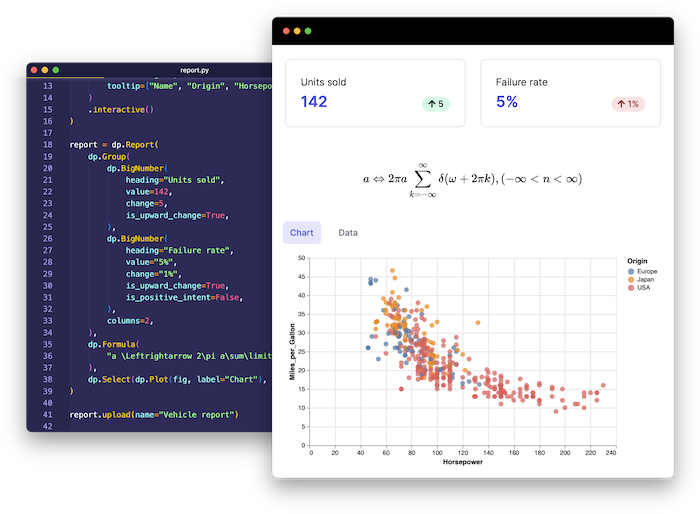

In [9]:
ar.Media(file="./image.png", name="Image1", caption="Arakawa in action!")

Or attach a file that your user can download:

In [10]:
data_path = "./netflix_stock_data.csv"

ar.Attachment(file=data_path)

Check out [Media and embeds](/reference/display-blocks/embeds/) in the API Reference.

## Automatic conversion

As well as explicitly specifying your block type (for instance, by using `ar.Plot`), Arakawa will try and choose the best block for your object if you pass it in directly.

The defaults are as follows:

| Object Type           | Arakawa Block |
| --------------------- | -------------- |
| pandas DataFrame      | `ar.Table` (up to 100 cells),<br> `ar.DataTable` (over 100 cells) |
| string                | `ar.Text`      |
| Altair                | `ar.Plot`      |
| Bokeh                 | `ar.Plot`      |
| Folium                | `ar.Plot`      |
| Matplotlib / Seaborn  | `ar.Plot`      |
| Plotly                | `ar.Plot`      |